In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

C:\Users\nourma059258\AppData\Local\Continuum\miniconda2\envs\py36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('Insurance_Loss.csv')

In [3]:
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
0,150024,24,5,1,M,Married,11,P,203.319595
1,144880,31,10,1,F,Single,6,P,402.197302
2,133742,56,37,1,M,Married,0,D,553.132096
3,151282,52,31,1,F,Married,15,P,292.430579
4,174407,20,3,1,M,Single,15,P,246.540576


In [4]:
df.nunique()

Policy Number                  15290
Age                               55
Years of Driving Experience       54
Number of Vehicles                 4
Gender                             2
Married                            2
Vehicle Age                       16
Fuel Type                          2
Losses                         15289
dtype: int64

In [5]:
print(df.dtypes, '\n\n')
print(df.shape)

Policy Number                    int64
Age                              int64
Years of Driving Experience      int64
Number of Vehicles               int64
Gender                          object
Married                         object
Vehicle Age                      int64
Fuel Type                       object
Losses                         float64
dtype: object 


(15290, 9)


In [6]:
df.describe()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Vehicle Age,Losses
count,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000,15290.000000
mean,149961.789339,42.328254,23.732897,2.495880,8.655723,389.859718
std,28947.841061,18.280511,17.850707,0.953776,4.344536,253.729433
min,100002.000000,16.000000,0.000000,1.000000,0.000000,12.534521
25%,124900.500000,24.000000,6.000000,2.000000,6.000000,226.434217
50%,149897.500000,42.000000,23.000000,2.000000,9.000000,354.937874
75%,175019.500000,61.000000,42.000000,3.000000,12.000000,488.676927
max,200454.000000,70.000000,53.000000,4.000000,15.000000,3500.000000


In [7]:
print(df.sort_values(by='Losses').head(7), '\n\n\n')
print(df.sort_values(by='Losses').tail(7))

       Policy Number  Age  Years of Driving Experience  Number of Vehicles  \
11180         144717   64                           46                   3   
13657         168897   67                           49                   4   
14931         168101   65                           45                   4   
3352          183044   63                           45                   2   
13514         177232   67                           49                   4   
9669          148660   66                           46                   3   
7247          117196   70                           52                   2   

      Gender  Married  Vehicle Age Fuel Type     Losses  
11180      F  Married           11         P  12.534521  
13657      M  Married           12         P  12.614093  
14931      F  Married           15         P  13.290628  
3352       F  Married           12         P  13.901110  
13514      F  Married           12         P  14.860606  
9669       F  Married      

In [8]:
df.sort_values(by='Age', ascending=False).head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses
7645,107033,70,49,2,M,Married,5,P,359.578636
872,194825,70,51,1,F,Single,8,P,343.268517
12570,175072,70,53,3,M,Married,7,P,33.874488
4390,160641,70,52,2,M,Single,15,P,228.126870
7857,160403,70,50,3,M,Married,5,P,436.188714


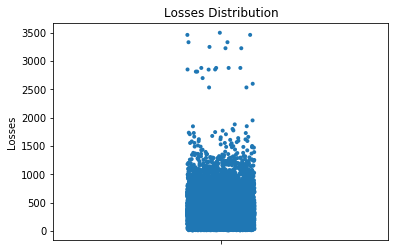

In [9]:
sns.stripplot(y='Losses', data=df, size = 4, jitter = True)
plt.ylabel('Losses')
plt.title('Losses Distribution')
plt.show()

In [25]:
df['Cap_Loss'] = df['Losses']
df.loc[df.Losses>2000,'Cap_Loss']=2000

In [26]:
df['logCap_Loss'] = np.log(df['Losses'])

In [27]:
df['rootCap_Loss'] = np.sqrt(df['Losses'])

In [28]:
df['New_Age'] = df.Age

In [29]:
df.loc[(df.Age > 14) & (df.Age <= 24),'New_Age']= 19.5
df.loc[(df.Age > 24) & (df.Age <= 34),'New_Age']= 29.5
df.loc[(df.Age > 34) & (df.Age <= 44),'New_Age']= 39.5
df.loc[(df.Age > 44) & (df.Age <= 54),'New_Age']= 49.5
df.loc[(df.Age > 54) & (df.Age <= 64),'New_Age']= 59.5
df.loc[(df.Age > 64) & (df.Age <= 74),'New_Age']= 69.5

In [15]:
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses,Cap_Loss,logCap_Loss,rootCap_Loss,New_Age
0,150024,24,5,1,M,Married,11,P,203.319595,203.319595,5.314779,14.259018,19.5
1,144880,31,10,1,F,Single,6,P,402.197302,402.197302,5.996943,20.054857,29.5
2,133742,56,37,1,M,Married,0,D,553.132096,553.132096,6.315597,23.518761,59.5
3,151282,52,31,1,F,Married,15,P,292.430579,292.430579,5.678227,17.100602,49.5
4,174407,20,3,1,M,Single,15,P,246.540576,246.540576,5.507527,15.701611,19.5


In [16]:
lm = smf.ols(formula="df.Losses~df['Years of Driving Experience']+df['Age']+df['Vehicle Age']",
             data=df).fit()

In [17]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df.Losses   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     2771.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        15:00:11   Log-Likelihood:            -1.0302e+05
No. Observations:               15290   AIC:                         2.061e+05
Df Residuals:                   15286   BIC:                         2.061e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                           981.0066     22.626     43.357      0.000     936.656    1025.357
df['Years of Driving Experience']     3.7877      1.231      3.076      0.002       1.374       6.201
df['Age']                           -11.2160      1.204     -9.315      0.000     -13.576      -8.856
df['Vehicle Age']                   -23.8326      0.393    -60.674      0.000     -24.603     -23.063
==============================================================================
Omnibus:                    12210.724   Durbin-Watson:                   1.788
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           785012.271
Skew:                           3.361   Prob(JB):                         0.00
Kurtosis:                      37.453   Cond. No.                         756.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
df['IsSingle'] = df.Married.map({'Single':1,'Married':0})

In [19]:
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses,Cap_Loss,logCap_Loss,rootCap_Loss,New_Age,IsSingle
0,150024,24,5,1,M,Married,11,P,203.319595,203.319595,5.314779,14.259018,19.5,0
1,144880,31,10,1,F,Single,6,P,402.197302,402.197302,5.996943,20.054857,29.5,1
2,133742,56,37,1,M,Married,0,D,553.132096,553.132096,6.315597,23.518761,59.5,0
3,151282,52,31,1,F,Married,15,P,292.430579,292.430579,5.678227,17.100602,49.5,0
4,174407,20,3,1,M,Single,15,P,246.540576,246.540576,5.507527,15.701611,19.5,1


In [20]:
lm = smf.ols(formula="df.Losses~df['Age']+df['Vehicle Age']+df['IsSingle']",
             data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df.Losses   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     3771.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        15:00:11   Log-Likelihood:            -1.0211e+05
No. Observations:               15290   AIC:                         2.042e+05
Df Residuals:                   15286   BIC:                         2.043e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           848.8103      5.863    144.763      0.000     837.317     860.303
df['Age']            -7.5487      0.088    -86.026      0.000      -7.721      -7.377
df['Vehicle Age']   -23.9120      0.369    -64.762      0.000     -24.636     -23.188
df['IsSingle']      137.5784      3.112     44.208      0.000     131.478     143.678
==============================================================================
Omnibus:                    12844.422   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1053938.101
Skew:                           3.563   Prob(JB):                         0.00
Kurtosis:                      43.044   Cond. No.                         178.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
df['IsMale'] = df.Gender.map({'F':0,'M':1})
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses,Cap_Loss,logCap_Loss,rootCap_Loss,New_Age,IsSingle,IsMale
0,150024,24,5,1,M,Married,11,P,203.319595,203.319595,5.314779,14.259018,19.5,0,1
1,144880,31,10,1,F,Single,6,P,402.197302,402.197302,5.996943,20.054857,29.5,1,0
2,133742,56,37,1,M,Married,0,D,553.132096,553.132096,6.315597,23.518761,59.5,0,1
3,151282,52,31,1,F,Married,15,P,292.430579,292.430579,5.678227,17.100602,49.5,0,0
4,174407,20,3,1,M,Single,15,P,246.540576,246.540576,5.507527,15.701611,19.5,1,1


In [22]:
lm = smf.ols(formula="df.Losses~df['Age']+df['Vehicle Age']+df['IsMale']+df['IsSingle']",
             data=df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df.Losses   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     3243.
Date:                Wed, 30 May 2018   Prob (F-statistic):               0.00
Time:                        15:00:11   Log-Likelihood:            -1.0165e+05
No. Observations:               15290   AIC:                         2.033e+05
Df Residuals:                   15285   BIC:                         2.033e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           803.4807      5.875    136.756      0.000     791.964     814.997
df['Age']            -7.5608      0.085    -88.808      0.000      -7.728      -7.394
df['Vehicle Age']   -23.8863      0.358    -66.677      0.000     -24.588     -23.184
df['IsMale']         93.2208      3.019     30.876      0.000      87.303      99.139
df['IsSingle']      136.8325      3.020     45.316      0.000     130.914     142.751
==============================================================================
Omnibus:                    13221.371   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1266631.331
Skew:                           3.683   Prob(JB):                         0.00
Kurtosis:                      46.976   Cond. No.                         186.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# df['IsDiesel'] = df['Fuel Type'].map({'P':0,'D':1})
df.head()

,Policy Number,Age,Years of Driving Experience,Number of Vehicles,Gender,Married,Vehicle Age,Fuel Type,Losses,Cap_Loss,logCap_Loss,rootCap_Loss,New_Age,IsSingle,IsMale
0,150024,24,5,1,M,Married,11,P,203.319595,203.319595,5.314779,14.259018,19.5,0,1
1,144880,31,10,1,F,Single,6,P,402.197302,402.197302,5.996943,20.054857,29.5,1,0
2,133742,56,37,1,M,Married,0,D,553.132096,553.132096,6.315597,23.518761,59.5,0,1
3,151282,52,31,1,F,Married,15,P,292.430579,292.430579,5.678227,17.100602,49.5,0,0
4,174407,20,3,1,M,Single,15,P,246.540576,246.540576,5.507527,15.701611,19.5,1,1


In [24]:
lm = smf.ols(formula="df.Cap_Loss~df['Age']+df['Vehicle Age']+df['IsSingle']+df['IsDiesel']+df['IsMale']",
             data=df).fit()
lm.summary()

PatsyError: Error evaluating factor: KeyError: 'IsDiesel'
    df.Cap_Loss~df['Age']+df['Vehicle Age']+df['IsSingle']+df['IsDiesel']+df['IsMale']
                                                           ^^^^^^^^^^^^^^

In [ ]:
df.groupby("Number of Vehicles").describe()['Vehicle Age']

In [ ]:
lr = LinearRegression()
feature_cols = ['Age', 'Vehicle Age', 'IsSingle', 'IsDiesel', 'IsMale']
x = df[feature_cols]
y = df['Cap_Loss']

In [ ]:
lr.fit(x,y)

In [ ]:
b0 = lr.intercept_

In [ ]:
b = lr.coef_
b1 = b[0]
b2 = b[1]
b3 = b[2]
b4 = b[3]
b5 = b[4]

In [ ]:
yhat = b0+b1*df.Age+b2*df['Vehicle Age']+b3*df.IsSingle+b4*df.IsDiesel+b5*df.IsMale
error = df.Losses-yhat

In [ ]:
feature_cols = ['Age','Vehicle Age','IsSingle','IsDiesel','IsMale']
X = df[feature_cols]
Y = df.Cap_Loss
lm = LinearRegression()
lm.fit(x,y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 42)

In [ ]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
rmse_train = np.sqrt(metrics.mean_squared_error(Y_train,y_pred_train))
rmse_train

In [ ]:
rmse_test = np.sqrt(metrics.mean_squared_error(Y_test,y_pred_test))
rmse_test

In [ ]:
metrics.r2_score(Y_test, y_pred_test)

In [ ]:
metrics.r2_score(Y_train, y_pred_train)

In [ ]:
plt.scatter(y_pred_train,Y_train-y_pred_train)
plt.scatter(lm.predict(X_test),Y_test-lm.predict(X_test))
plt.hlines(y=0,xmin=0,xmax=1000)
plt.xlabel('Y model')
plt.ylabel('Residual')
plt.show()

In [ ]:
residu_test = Y_test - y_pred_test
sns.distplot(residu_test)
plt.xlabel('residual')
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
[variance_inflation_factor(X_train.values,j) for j in range(X_train.shape[1])]
# karena nilainya kurang dari 4 jadi nilianya acceptable

In [ ]:
lm2 = smf.ols(formula = "Cap_Loss~Age+df['Vehicle Age']+IsSingle+IsMale+IsDiesel", data=df).fit()

from scipy import stats
stats.shapiro(lm2.resid)

#karena p-value kecil sekali, maka H0 ditolak, residual tidak normal

In [ ]:
sm.qqplot(lm2.resid)

In [ ]:
from statsmodels.stats import diagnostic

In [ ]:
diagnostic.acorr_ljungbox(lm2.resid, lags = 1)
# p-valuenya 0.504 > 0.05 maka H0 diterima
# lags perbedaan row ke-x dan row ke-(x+1)

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
test = sms.het_goldfeldquandt(lm2.resid,lm2.model.exog)
#exo genius -> effect dari luar
#p-valuenya 0.07 > 0.05 H0 diterima. error termnya homo.

In [ ]:
test

In [ ]:
influence = lm2.get_influence()
resid_student = influence.resid_studentized_external #studentize residual
(cooks, p) = influence.cooks_distance
(dffits, p) = influence.dffits
leverage = influence.hat_matrix_diag #leverage value

In [ ]:
a = pd.Series(resid_student, name = 'Studentized Residuals')
a.index += 1

In [ ]:
resid = pd.concat([X_train,a],axis=1)
resid

In [ ]:
ind = resid.loc[np.absolute(resid['Studentized Residuals'])>3,:].index
ind

In [ ]:
resid.drop(ind)

In [ ]:
def plot_learning_curve(model,X,Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.25, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_pred, Y_train[:m]))
        val_errors.append(mean_squared_error(y_val_pred, Y_val))
    plt.plot(np.sqrt(train_errors), "r-+", label='train')
    plt.plot(np.sqrt(val_errors), label='val')
    

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lm = LinearRegression()

In [ ]:
plot_learning_curve(lm, X_train, Y_train)

In [ ]:
df.groupby('Married').mean()

In [ ]:
lm = smf.ols(formula="df.Losses~df['Age']+df['Vehicle Age']",
             data=df).fit()
lm.summary()

In [ ]:
dfcov = df[['Age','Years of Driving Experience', 'Number of Vehicles', 'Vehicle Age', 'Losses']]
dfcov.head()

In [ ]:
from sklearn import preprocessing
from matplotlib.pyplot import cm
std_scale= preprocessing.StandardScaler().fit(dfcov)
df_std= std_scale.transform(dfcov)
df2=pd.DataFrame(df_std)
df2.head()
print(df2.cov())
sns.heatmap(df2.cov(), cmap=cm.Blues, annot=True)
plt.show()

In [ ]:
dfcov = df[['Age','Vehicle Age', 'IsSingle','IsDiesel','IsMale','Losses']]
dfcov.head()

In [ ]:
std_scale= preprocessing.StandardScaler().fit(dfcov)
df_std= std_scale.transform(dfcov)
df2=pd.DataFrame(df_std)
df2.head()
print(df2.cov())
sns.heatmap(df2.cov(), cmap=cm.Blues, annot=True)
plt.show()